### TOPIC: "Advertising Sales Prediction based on different advertising mediums." 

### FIELD: "Linear Regression”.

#### Dataset: [https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data]

##### Achyuth Anand - 205001003
##### Aravind R - 205001013
##### Bhuvnesh Magotra - 205001021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('./Data.csv')

1. This code is a Python script that imports the NumPy, Pandas and Matplotlib libraries. 

2. The NumPy library is used for numerical operations on arrays and matrices. 

3. The Pandas library is used for data manipulation and analysis. 

4. The Matplotlib library is used for data visualization. 

5. The pd.read_csv() function from Pandas library is used to read a CSV file into a DataFrame object. 



In [ ]:
import warnings
warnings.filterwarnings('ignore')

Data Extraction:
1. Removing unrequired columns.
2. Dropping NaN(Null) rows.

In [ ]:
#Replace the space in column names with an underscore
data.columns = [c.replace(' ', '_') for c in data.columns]

In [ ]:
data.drop('Influencer',axis='columns', inplace=True)

In [ ]:
#check if there is a null value in our dataset
data.isnull().values.any()


True

In [ ]:
#display the number of null values and its corresponding columns
data.isnull().sum()

TV              10
Radio            4
Social_Media     6
Sales            6
dtype: int64

In [ ]:
#Clean the data by deleting rows with null values, since their number
#is small compared to the total number of rows in the dataset, 
#so deleting them will not have a significant effect.

data.dropna(subset = ['TV'], inplace=True)
data.dropna(subset = ['Radio'], inplace=True)
data.dropna(subset = ['Social_Media'], inplace=True)
data.dropna(subset = ['Sales'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social_Media  4546 non-null   float64
 3   Sales         4546 non-null   float64
dtypes: float64(4)
memory usage: 177.6 KB


In [ ]:
data

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


1. The scatter plot shows the relationship between the total amount spent on advertising (TV, Radio and Social Media) and the sales. 

2. The x-axis represents the total amount spent on advertising while the y-axis represents the sales. 

3. The scatter plot shows that as the amount spent on advertising increases, so does the sales.

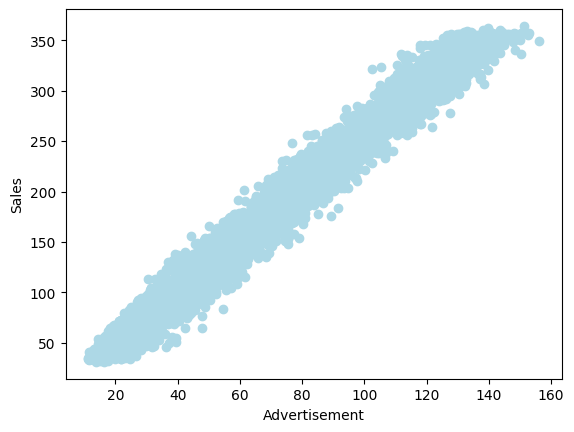

In [ ]:
plt.scatter(data["TV"] + data["Radio"] + data["Social_Media"],data["Sales"], color="lightblue")
plt.xlabel("Advertisement")
plt.ylabel("Sales")
plt.show()

- x: The input features (independent variables) of your dataset.
- y: The target variable (dependent variable) of your dataset.
- test_size: The proportion of the dataset to include in the test split. For example, if test_size=0.2, then 20% of the data will be used for testing and 80% for training.
- random_state: The seed used by the random number generator. This ensures that the same random splits are generated each time you run the code

In [ ]:
from sklearn.model_selection import train_test_split

#Create column "Advertisement" that combine the other three columns 
data['Advertisement'] = data["TV"] + data["Radio"] + data["Social_Media"]

#Save input as 2d array in variable x
x = data[['Advertisement']]

#Save output as 2d array in variable y 
y=data[['Sales']]

#Split input and output to training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Convert the Series to a NumPy array and Print the mean and standard deviation
#input x (Advertisement) and output y (Sales) columns
print('Advertisement: mean=%.3f stdv=%.3f' % (np.mean(x.values), np.std(x.values)))
print('Sales: mean=%.3f stdv=%.3f' % (np.mean(y.values), np.std(y.values)))

Advertisement: mean=75.544 stdv=36.122
Sales: mean=192.413 stdv=93.010


- Create a linear regression model using the scikit-learn library in Python. 
- The linear_model.LinearRegression() function is used to create the model. 
- The fit() function is used to fit the model to the training data. 
- The coef_ attribute of the model object contains the coefficients (slopes) of the linear regression line. 
- The intercept_ attribute contains the y-intercept of the line

In [ ]:
from sklearn import linear_model

#Create our first linear regression model
model_1=linear_model.LinearRegression()#Select linear regression model
model_1.fit(x_train,y_train)

#The coefficients:
print("coefficients: ", model_1.coef_)#Slope
print("Intercept: ", model_1.intercept_)#Intercept

coefficients:  [[2.5447444]]
Intercept:  [-0.04017377]


- x_train: The input features (independent variables) of your training dataset.
- model_1.coef_: The slope (coefficient) of the linear regression model.
- x_train*model_1.coef_+model_1.intercept_: The equation of the line (y = mx + b) where m is the slope and b is the y-intercept.
- ‘-r’: The color and style of the line. ‘-r’ means a solid red line

Text(0, 0.5, 'Sales')

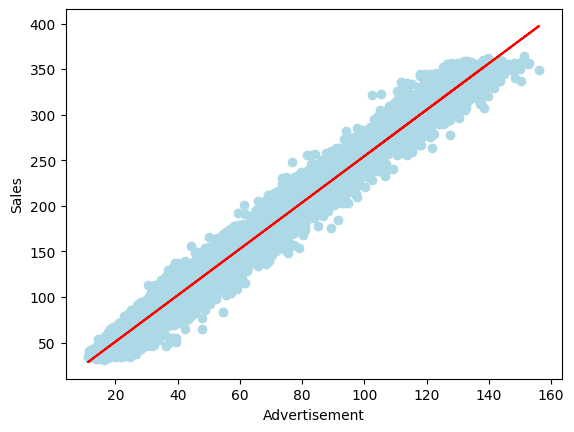

In [ ]:
#Plotting the regression line:
plt.scatter(data["Advertisement"], data["Sales"], color='lightblue')
plt.plot(x_train, model_1.coef_*x_train+model_1.intercept_,'-r')
plt.xlabel("Advertisement")
plt.ylabel("Sales")


* Predict sales using a linear regression model. 

* The code you provided is reshaping an array using numpy’s reshape function1 which is used to give a new shape to an array without changing its data. The reshape function takes an array_like object and a new shape as arguments. The new shape should be compatible with the original shape. If an integer is passed as the new shape, then the result will be a 1-D array of that length. One shape dimension can be -1 which means that the value is inferred from the length of the array and remaining dimensions.

* The code then uses the predict method of the linear regression model to predict sales. The predict method returns predicted values for the input samples.

In [ ]:
myAd = np.array(70000000).reshape(1,-1)

In [ ]:
prediction = model_1.predict(myAd)

In [ ]:
estimatedSales = '{:.6f}'.format(prediction.item()/1000000)
print("Estimated Sales is: {} million".format(estimatedSales))

Estimated Sales is: 178.132108 million


In [ ]:
y_pred = model_1.predict(x_test)

Calculating the evaluation metrics for the linear regression model. 
The evaluation metrics are used to assess the quality of predictions made by the model.

The three evaluation metrics calculated are:

> - Mean Absolute Error (MAE)
> - Mean Squared Error (MSE)
> - Root Mean Squared Error (RMSE)

The MAE is the average of the absolute differences between predicted and actual values. The MSE is the average of the squared differences between predicted and actual values. The RMSE is the square root of the MSE.

In [ ]:
from sklearn import metrics

# Calculate the evaluation metrics 

#1- Mean Absolute Error (MAE)
print('The mean absolute error is: ',metrics.mean_absolute_error(y_test, y_pred))

#2- Mean Squared Error (MSE)
print('The mean squared error is: ',metrics.mean_squared_error(y_test, y_pred))

#3- Root Mean Squared Error (RMSE)
print('The root mean squared error is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The mean absolute error is:  11.86999717820567
The mean squared error is:  221.55012058562846
The root mean squared error is:  14.884559804899453


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             4546 non-null   float64
 1   Radio          4546 non-null   float64
 2   Social_Media   4546 non-null   float64
 3   Sales          4546 non-null   float64
 4   Advertisement  4546 non-null   float64
dtypes: float64(5)
memory usage: 213.1 KB


In [ ]:
#Sum budget of each channel
type = data[["TV", "Radio", "Social_Media"]]
type.sum()

TV              245770.000000
Radio            82544.145483
Social_Media     15108.507602
dtype: float64

* plot a bar chart that shows the correlation between each channel and “Sales”. Here is what each argument in the plt.bar() function does:

* x: The x coordinates of the bars.

* y: The height of the bars.

* plt.xticks(x, type): Set the x-tick labels with the channel names.

* This will plot a bar chart that shows the correlation between each channel and “Sales”.

([<matplotlib.axis.XTick at 0x7f2e35e35cf0>,
 [Text(0, 0, 'TV'), Text(1, 0, 'Radio'), Text(2, 0, 'Social_Media')])

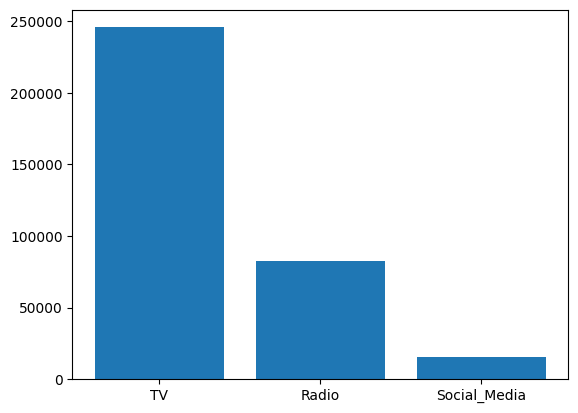

In [ ]:
#Plot the correlation between each channel and "Sales"
x = [i for i, _ in enumerate(type)]
y = type.sum()
plt.bar(x, y)
plt.xticks(x, type)


- Plotting a scatter plot of the relationship between the sales and the advertising budget for TV, Radio and Social Media.
- The x-axis represents the advertising budget for TV, Radio and Social Media. The y-axis represents the sales. 
- The scatter plot shows how the sales are related to the advertising budget for each medium.

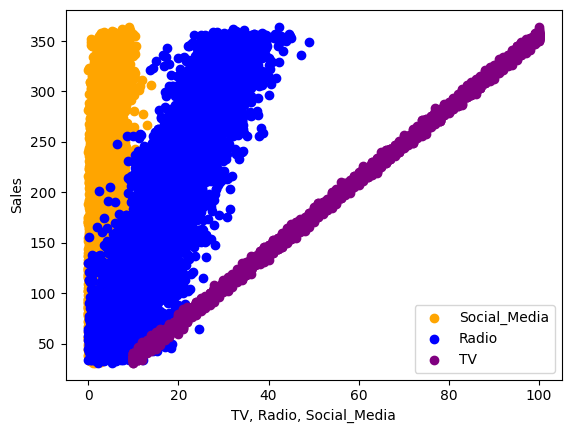

In [ ]:
plt.scatter(data["Social_Media"],data["Sales"], label = "Social_Media",  color="orange")
plt.scatter(data["Radio"],data["Sales"], label = "Radio",  color="blue")
plt.scatter(data["TV"],data["Sales"], label = "TV", color="purple")
plt.xlabel("TV, Radio, Social_Media")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
data

,TV,Radio,Social_Media,Sales,Advertisement
0,16.0,6.566231,2.907983,54.732757,25.474214
1,13.0,9.237765,2.409567,46.677897,24.647332
2,41.0,15.886446,2.913410,150.177829,59.799856
3,83.0,30.020028,6.922304,298.246340,119.942332
4,15.0,8.437408,1.405998,56.594181,24.843406
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,31.189450
4568,71.0,20.610685,6.545573,249.101915,98.156259
4569,44.0,19.800072,5.096192,163.631457,68.896264
4570,71.0,17.534640,1.940873,253.610411,90.475514


In [ ]:
#Compute the correlation between input/ output variables
data.corr(method ='pearson')

,TV,Radio,Social_Media,Sales,Advertisement
TV,1.000000,0.869158,0.527687,0.999497,0.987401
Radio,0.869158,1.000000,0.606338,0.868638,0.932667
Social_Media,0.527687,0.606338,1.000000,0.527446,0.604712
Sales,0.999497,0.868638,0.527446,1.000000,0.986884
Advertisement,0.987401,0.932667,0.604712,0.986884,1.000000



- #### TV advertising has the highest correlation with sales. 
- #### The correlation coefficient between TV and sales is 0.999497, which is very close to 1. 
- #### This suggests that there is a strong positive relationship between TV advertising and sales. 


- The plt.hist() function from Matplotlib library is used to compute and create a histogram of x. 
- The np.log1p() function is used to calculate the natural logarithm of 1+x element-wise for all elements in the array x. 
- The plt.figure() function is used to create a new figure with the specified size.

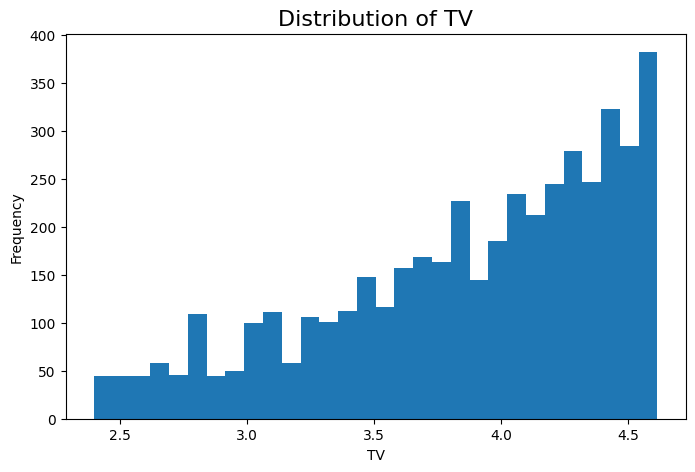

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(data.TV), bins=30)
plt.title('Distribution of TV', fontsize=16)
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()


- The code plt.hist(np.log1p(data.Sales), bins=30) is used to plot a histogram of the natural logarithm of the sales data. 
- The np.log1p() function is used to calculate the natural logarithmic value of x+1 where x belongs to all the input array elements. 
- This function is used instead of np.log() to avoid log(0) errors. The bins parameter specifies the number of bins in the histogram. 
- In this case, there are 30 bins. The plt.hist() function is used to plot the histogram. 
- It takes an array of dataset and array of bin as parameter and creates a histogram of the corresponding data values

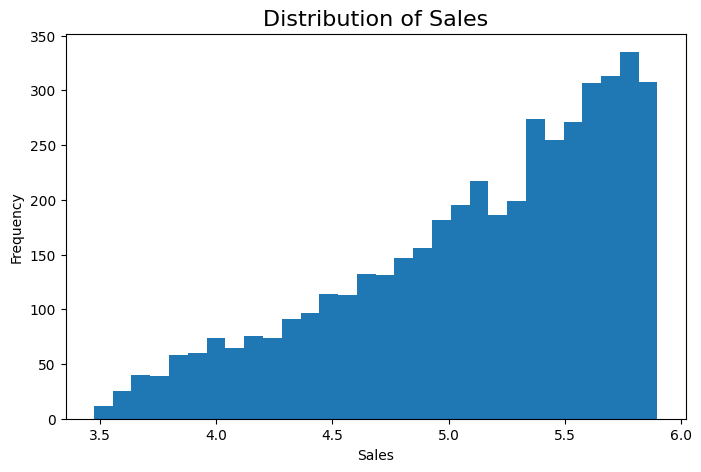

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(data.Sales), bins=30)
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


- Splitting the data into training and testing sets for a machine learning model. 
- The input data is saved as a 2D array in the variable x, which contains the TV column of the original data. 
- The output data is saved as a 2D array in the variable y, which contains the Sales column of the original data. 
- The input and output data are then split into training and testing sets using the train_test_split() function from scikit-learn. 
- The training set contains 80% of the data, while the testing set contains 20% of the data. 
- The random state is set to 42 to ensure that the same random split is obtained each time the code is run.

In [ ]:
#Save input as 2d array in variable x
x=data[['TV']]
#Save output as 2d array in variable y 
y=data[['Sales']]

#Split input and output to training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# print the mean and standard deviation for input x (TV) and output y (Sales) columns
print('TV: mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
print('Sales: mean=%.3f stdv=%.3f' % (np.mean(y), np.std(y)))

TV: mean=54.063 stdv=26.102
Sales: mean=192.413 stdv=93.010


In [ ]:
#Create our second linear regression model
model_2=linear_model.LinearRegression()#Select linear regression model
model_2.fit(x_train,y_train)

#The coefficients:
print("coefficients: ", model_2.coef_)#Slope
print("Intercept: ", model_2.intercept_)#Intercept

coefficients:  [[3.56191195]]
Intercept:  [-0.1689657]



- Plotting a scatter plot of the TV column of the data against the Sales column of the data using the scatter() function from matplotlib. 
- The plot is colored light blue. The code then plots a line on top of the scatter plot using the plot() function from matplotlib. 
- The line is generated using the coefficients and intercept from a linear regression model (model_2) that has been fit to the training data. 
- The x-axis of the plot represents the TV column of the data, while the y-axis represents the Sales column of the data. The x-axis is labeled “TV”, while the y-axis is labeled “Sales”.

Text(0, 0.5, 'Sales')

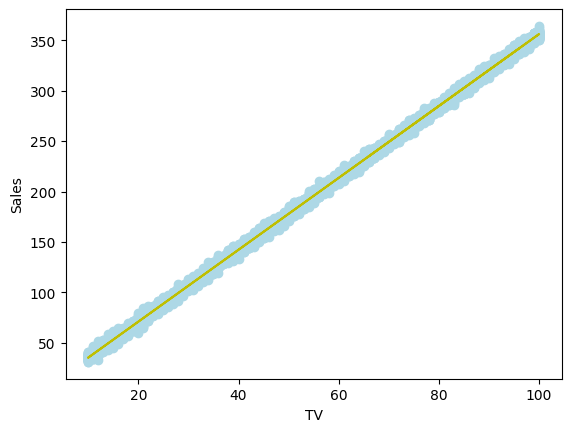

In [ ]:
#Plotting the regression line:
plt.scatter(data["TV"], data["Sales"], color='lightblue')
plt.plot(x_train, model_2.coef_*x_train+model_2.intercept_,'-y')
plt.xlabel("TV")
plt.ylabel("Sales")


-  Using the second model (model_2) to predict the sales for a given value of TV. 
-  The value of TV is set to 70,000,000 and is reshaped into a 2D array using the reshape() function from numpy. 
-  The predict() function from scikit-learn is then used to predict the sales for this value of TV. The predicted sales are then divided by 1,000,000 and formatted to six decimal places using the '{:.6f}'.format() function. The estimated sales are then printed to the console.

- The second block of code using the second model (model_2) to predict the sales for the testing data (x_test). The predicted sales are saved in the variable y_pred.

In [ ]:
#Predicting Sales for myTV using our second model:
myTV=np.array(70000000).reshape(1,-1)
prediction=model_2.predict(myTV)
estimatd_Sales='{:.6f}'.format(prediction.item()/1000000)
print("Estimated Sales is: {} million".format(estimatd_Sales))

Estimated Sales is: 249.333837 million


In [ ]:
y_pred = model_2.predict(x_test)


- Calculating the evaluation metrics for the second model (model_2). 
- The first metric calculated is the mean absolute error (MAE), which is calculated using the mean_absolute_error() function from scikit-learn. The MAE is then printed to the console. 
- The second metric calculated is the mean squared error (MSE), which is calculated using the mean_squared_error() function from scikit-learn. The MSE is then printed to the console. 
- The third metric calculated is the root mean squared error (RMSE), which is calculated using the sqrt() function from numpy and the mean_squared_error() function from scikit-learn. The RMSE is then printed to the console

In [ ]:
# Calculate the evaluation metrics 

#1- Mean Absolute Error (MAE)
print('The mean absolute error is: ',metrics.mean_absolute_error(y_test, y_pred))

#2- Mean Squared Error (MSE)
print('The mean squared error is: ',metrics.mean_squared_error(y_test, y_pred))

#3- Root Mean Squared Error (RMSE)
print('The root mean squared error is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The mean absolute error is:  2.3108516081408705
The mean squared error is:  8.313211608212859
The root mean squared error is:  2.8832640545418067


> Second model has lower values for all three evaluation metrics than the first model, which suggests that it is a better fit for the data.